<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Симуляции-случайных-величин" data-toc-modified-id="Симуляции-случайных-величин-1">Симуляции случайных величин</a></span></li><li><span><a href="#1.-Генерация-случайных-величин-в-python" data-toc-modified-id="1.-Генерация-случайных-величин-в-python-2">1. Генерация случайных величин в python</a></span></li><li><span><a href="#2.-Плотность-и-функция-распределения" data-toc-modified-id="2.-Плотность-и-функция-распределения-3">2. Плотность и функция распределения</a></span></li><li><span><a href="#3.-Эмпирическое-распределение" data-toc-modified-id="3.-Эмпирическое-распределение-4">3. Эмпирическое распределение</a></span></li><li><span><a href="#4.-Генерация-выборок" data-toc-modified-id="4.-Генерация-выборок-5">4. Генерация выборок</a></span></li><li><span><a href="#5.-Зёрна" data-toc-modified-id="5.-Зёрна-6">5. Зёрна</a></span></li></ul></div>


#  Симуляции случайных величин

В этой тетрадке мы поговорим как в python можно симулировать разные случайные величины и смотреть как они выглядят.

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

# 1. Генерация случайных величин в python


Иногда для решения задач по теории вероятностей или исследования свойств статистических алгоритмов нужно сгенерировать случайную выборку из какого-нибудь распределения. Чтобы сгенерировать в `python` любую случайную величину, нужно сделать две вещи: 

* Создать генератор. 

Внутри пакета `scipy.stats` есть [много разных распределений.](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) Среди всего этого обилия нужно найти нужное распределение и задать его параметры. Давайте сделаем это  на примере **нормального распределения**, $X \sim N(\mu, \sigma^2)$. Того самого распределения, плотность которого выглядит как: 

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$


Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$.

In [2]:
norm_rv = stats.norm()#loc=0, scale=1)  # задали генератор 

Когда конкретный генератор готов, у него можно вызывать разные методы: 

* `rvs` сгенерирует нам выборку из распределения объёма `size`
* `cdf` вычислит для нас значение функции распределения (cumulative distribution function) в указанной точке
* `pdf` вычислит значение плотности распредеелния (probability density function) в указанной точке 
* `ppf` вычислит квантиль, указанного уровня

[В документации](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) можно найти и другие методы, но мы с ними практически не будем встречаться в течение нашего курса (см. разел statistical functions).

In [3]:
sample = norm_rv.rvs(1000)  # сгенерируем 1000 значений
sample[:10]

array([ 0.70700111, -0.39535115,  1.49133196,  0.50963899,  0.90496943,
       -1.2365586 , -0.97426734, -0.25317238, -0.17572125, -0.8633457 ])

In [4]:
sample.shape

(1000,)

In [5]:
sample.mean()

0.060068488506533325

In [6]:
sample.var()

0.9878185406232808

In [7]:
(sample.mean() + 10) * 60 * 24

14486.498623449408

In [8]:
84**0.5

9.16515138991168

In [9]:
((sample+10) * 60 * 24).mean()

14486.49862344941

In [10]:
((sample + 10) * 60 * 24).var()

2048340.5258364354

In [11]:
sample.var() * (60 * 24)**2

2048340.5258364351

# 2. Плотность и функция распределения


Теперь мы можем немного поэкспериментировать с нашей случайной величиной. Например, __мы можем узнать $f(1)$__.

In [12]:
norm_rv.pdf(1)

0.24197072451914337

Можем построить картинку для плотности распределения, $f(x)$. 

In [13]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

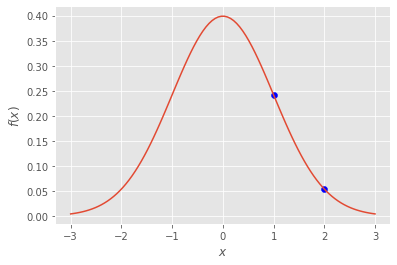

In [14]:
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1,2], 
            [norm_rv.pdf(1), norm_rv.pdf(2)], color="blue");

Теперь узнаем значение функции распределения в точке $1$: $$F(1) = P(X \le 1) = \int_{-\infty}^1 f(x)dx$$

In [15]:
norm_rv.cdf(1)

0.8413447460685429

На плотности распределения это выглядит как площадь до точки $1$, то есть вероятность того, что $X \le 1$.

0.8413447460685429


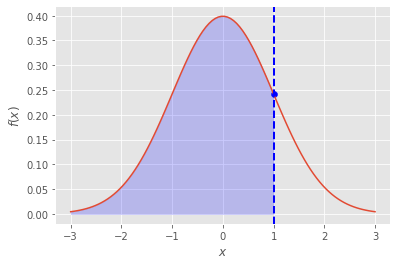

In [16]:
x_ = 1

x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([x_], [norm_rv.pdf(x_)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(-3, x_, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(x_, color='blue', linestyle="--", lw=2);

print(norm_rv.cdf(x_))

In [17]:
# правило 3 сигм
for x in [1,2,3]:
    print(f'P({-x} <X< {x}) = ',norm_rv.cdf(x)-norm_rv.cdf(-x))

P(-1 <X< 1) =  0.6826894921370859
P(-2 <X< 2) =  0.9544997361036416
P(-3 <X< 3) =  0.9973002039367398


Можем построить картинку для функции распределения.

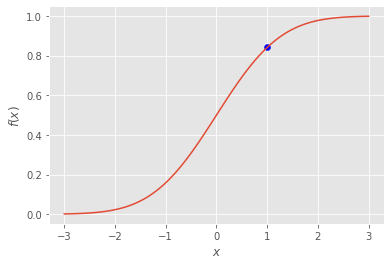

In [18]:
x = np.linspace(-3, 3, 100)
cdf = norm_rv.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем F(1)
plt.scatter([x_], [norm_rv.cdf(x_)], color="blue");

А теперь найдём ещё одну вероятность:

$$ P(1 < X < 3) = \int_1^3 f(x) dx = F(3) - F(1)$$

In [19]:
norm_rv.cdf(3) - norm_rv.cdf(1)

0.15730535589982697

Это уже вероятность попасть в конкретный отрезок, изобразим её на плотности распределения. 

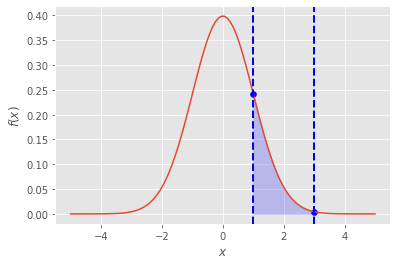

In [20]:
x = np.linspace(-5, 5, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1, 3], [norm_rv.pdf(1), norm_rv.pdf(3)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(1, 3)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2)
plt.axvline(3, color='blue', linestyle="--", lw=2);

Для полноты картины осталось только найти какой-нибудь квантиль. Квантиль уровня $\gamma$ это такое число $q$, что 

$$P(X \le q) = \gamma$$

Найдём $5\%$ и нарисуем его на картинке с плотностью:

2.3263478740408408


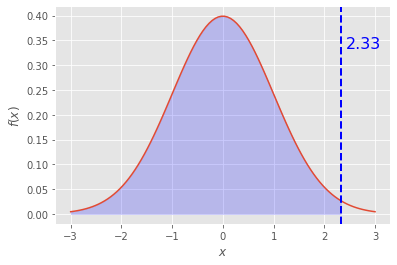

In [21]:
q = norm_rv.ppf(0.99)
# q = norm_rv.ppf(0.25)  # квартиили - это квантили уровня 0.25 и 0.75
# q = norm_rv.ppf(0.5)  # медиана - квантиль 0.50
print(q)

x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq = np.linspace(-3, q)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(q, color='blue', linestyle="--", lw=2)

y_max = plt.ylim()[1]
plt.text(q + 0.1, 0.8*y_max, round(q,2), color='blue', fontsize=16);

Обратите внимание, что всё, что мы сейчас делали - мы делали с теоретическим распределением. По аналогии можно работать с любым другим распределением. Например, с экспоненциальным: 

In [22]:
exp_rv = stats.expon(scale=5)
exp_rv.rvs(5)

array([9.07757671, 7.82232057, 9.45014196, 2.85917375, 5.59671544])

# 3. Эмпирическое распределение 

Давайте теперь поработаем с выборкой. Обычно мы не знаем из какого распределения она пришла к нам в руки. Мы можем посчитать какие-нибудь характеристики для нашей случайной величины.

In [23]:
sample[:10]

array([ 0.70700111, -0.39535115,  1.49133196,  0.50963899,  0.90496943,
       -1.2365586 , -0.97426734, -0.25317238, -0.17572125, -0.8633457 ])

In [24]:
sample.shape

(1000,)

In [25]:
np.mean(sample)  # выборочное среднее(при больших n похоже на математическое ожидание)

0.060068488506533325

In [26]:
np.var(sample)   # выборочная дисперсия

0.9878185406232808

$$\bar{x^2} - (\bar{x})^2 = \frac{1}{n}\sum_{i=1}^n {x_i^2} - (\bar{x})^2 $$

In [27]:
(sample**2).mean() - (sample.mean())**2

0.9878185406232808

In [28]:
np.std(sample)   # выборочное стандартное отклонение

0.9938906079761901

In [29]:
np.median(sample) # выборочная медиана

0.05740044037120631

Построим гистограмму. Гистограмма - это эмпирическая оценка для плотности распределения. 

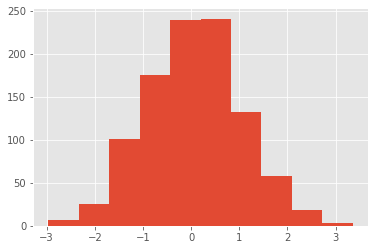

In [30]:
plt.hist(sample, bins=10);  # bins отвечает за число столбцов

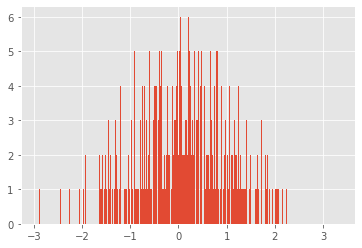

In [31]:
plt.hist(sample, bins=1000);  # bins отвечает за число столбцов

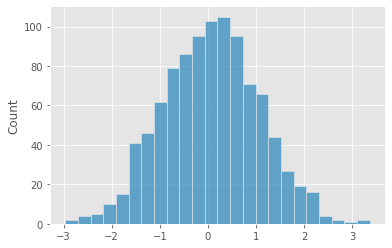

In [32]:
sns.histplot(sample);#, bins=11);

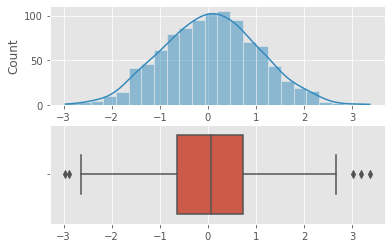

In [33]:
plt.subplot(211)
sns.histplot(sample, kde=True);

plt.subplot(212)
sns.boxplot(x=sample);

Нарисуем гистограмму и плотность на одной картинке. 

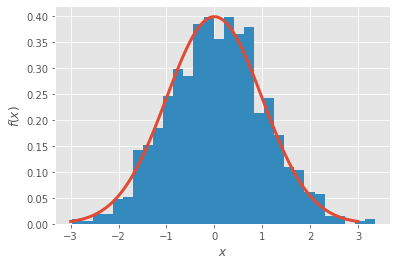

In [34]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
plt.hist(sample, bins=30, density=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

Построим по выборке эмпирическую функцию распределения. 

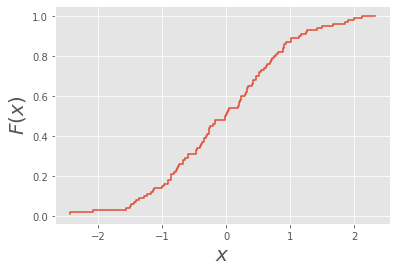

In [35]:
# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample[:100])   # строим эмпирическую функцию по выборке

plt.step(ecdf.x, ecdf.y)
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

Можно нарисовать её на одной картинке с теоретической:

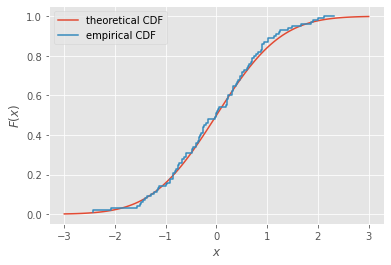

In [36]:
x = np.linspace(-3, 3, 100)

# теоретическа cdf 
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample[:100])
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

# 4. Генерация выборок

С помощью таких же нехитрых манипуляций можно симулировать различные события. Например, можно сгенерировать выборку без повторений из вектора `1:10` размера `5`. Все элементы будут выбираться равновероятно.

Мы это будем делать [с помощью `np.random`.](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html) Внутри numpy реализованы самые простые генераторы, и их, обычно, использовать довольно удобно. 

In [37]:
dice = np.arange(1,6+1)
dice

array([1, 2, 3, 4, 5, 6])

In [38]:
np.random.choice(dice, 
                 size=2,
                 replace=False) # выборка без повторений

array([1, 5])

Можно делать генерации с повторениями, параметр `replace` базово равен `True`.

In [39]:
np.random.choice(dice, 
                 size=100,
                 replace=True) # с повторениями

array([5, 3, 2, 5, 5, 5, 4, 3, 3, 3, 4, 1, 2, 5, 6, 1, 2, 3, 4, 4, 5, 2,
       2, 3, 6, 2, 1, 4, 6, 6, 3, 5, 2, 6, 2, 6, 3, 4, 6, 4, 3, 3, 5, 6,
       1, 5, 5, 4, 1, 1, 3, 1, 3, 4, 6, 2, 6, 6, 3, 1, 5, 3, 4, 5, 4, 4,
       6, 5, 4, 6, 5, 6, 3, 6, 4, 1, 6, 5, 2, 4, 2, 1, 1, 1, 1, 3, 3, 2,
       1, 5, 5, 2, 3, 4, 4, 3, 5, 3, 1, 4])

А ещё можно самостоятельно расставить вероятности событий. Давайте, например устроим симуляцию рыбалки! 

In [40]:
np.random.choice(['карась', 'плотва', 'щука'], 
                 size=10, 
                 p=[0.5, 0.2, 0.3]) # с повторениями

array(['щука', 'карась', 'плотва', 'плотва', 'карась', 'щука', 'карась',
       'щука', 'карась', 'плотва'], dtype='<U6')

# 5. Зёрна 

Если выполнить команду `stats.norm(loc=3, scale=2).rvs(5)` на двух разных компьютерах или два раза на одном и том же, то результат будет разный. Не зря же они случайные :)

In [41]:
rv = stats.norm(loc=3, scale=2)
rv.rvs(5)

array([1.52573388, 0.31263381, 6.30485415, 4.51505013, 3.70988069])

In [42]:
stats.norm(loc=3, scale=2).rvs(5)

array([7.04469065, 4.1550999 , 2.60113322, 0.08341626, 2.61464604])

Однако генерирование случайных величин никак не противоречит идее абсолютно точной воспроизводимости исследований. Для того, чтобы получились одинаковые результаты, необходимо синхронизировать генераторы случайных чисел на этих двух компьютерах. Делается это путём задания зерна генератора случайных чисел (seed). Зерно также называют стартовым значением. В качестве зерна подойдёт любое целое число.

In [43]:
stats.norm(loc=3, scale=2).rvs(5, random_state=111)

array([0.73232333, 3.76863839, 5.99310755, 2.28923541, 1.42493292])

In [44]:
stats.norm(loc=3, scale=2).rvs(5, random_state=111)

array([0.73232333, 3.76863839, 5.99310755, 2.28923541, 1.42493292])

__Угадайте, какие числа чаще всего используют для зёрен?__

Многие алгоритмы в анализе данных в какой-то степени основаны на случайности (например в самом начале обучения веса берутся из какого-то распределения или обучение идёт на случайной подвыборке). Чтобы добиться воспроизводимых, одинаковых результатов, не зависящих от запуска, нужно устанавливать зерно генерации. 